In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bean = pd.read_csv("Dry_Bean_Dataset.csv")  

print(bean.head())
print(bean.info())
print(bean.describe())
print(bean.shape)
print(bean.info())


    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

In [5]:
print(bean.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [7]:
missing_values = bean.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

duplicates = bean.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

if duplicates > 0:
    bean = bean.drop_duplicates()
    print("Duplicates removed.")


Missing values in each column:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

Number of duplicate rows: 68
Duplicates removed.


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = bean.select_dtypes(include=[np.number]).columns
scaled_data = scaler.fit_transform(bean[numerical_cols])

scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

print("\nScaled data sample:")
print(scaled_df.head())


Scaled data sample:
       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0 -0.838800  -1.139663        -1.301976        -0.632111     -1.565363   
1 -0.827266  -1.010529        -1.391169        -0.435758     -1.972460   
2 -0.805287  -1.075303        -1.247807        -0.586775     -1.514305   
3 -0.783920  -0.973894        -1.274241        -0.440595     -1.742960   
4 -0.779429  -1.093821        -1.375750        -0.268281     -2.121534   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0     -2.182833   -0.839489      -1.060491  0.287981  0.366476   1.420346   
1     -3.685504   -0.824175      -1.041410  0.697598 -0.465886   0.224987   
2     -2.042229   -0.806818      -1.005357  0.577958  0.517614   1.248979   
3     -2.740196   -0.772170      -0.970686  0.671302 -2.248692   0.509588   
4     -4.535823   -0.782457      -0.963445  0.475476  0.804605   1.872434   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4 

In [11]:
print("\nClass Distribution:")
print(bean['Class'].value_counts())


Class Distribution:
Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


In [41]:

grouped_data = bean.groupby('Class').mean()  
print("\nGrouped Data - Mean:")
print(grouped_data)


count_data = bean.groupby('Class').count()
print("\nGrouped Data - Count:")
print(count_data)




Grouped Data - Mean:
                   Area    Perimeter  MajorAxisLength  MinorAxisLength  \
Class                                                                    
BARBUNYA   69804.133132  1046.105764       370.044279       240.309352   
BOMBAY    173485.059387  1585.619079       593.152075       374.352547   
CALI       75538.211043  1057.634282       409.499538       236.370616   
DERMASON   32118.710942   665.209536       246.557279       165.657143   
HOROZ      53671.732796   920.108600       372.693927       184.197789   
SEKER      39881.299951   727.672440       251.291957       201.909653   
SIRA       44729.128604   796.418737       299.380258       190.800250   

          AspectRation  Eccentricity     ConvexArea  EquivDiameter    Extent  \
Class                                                                          
BARBUNYA      1.544395      0.754665   71025.729198     297.311018  0.749273   
BOMBAY        1.585550      0.770518  175813.116858     468.941426  0.7

<Figure size 600x400 with 0 Axes>

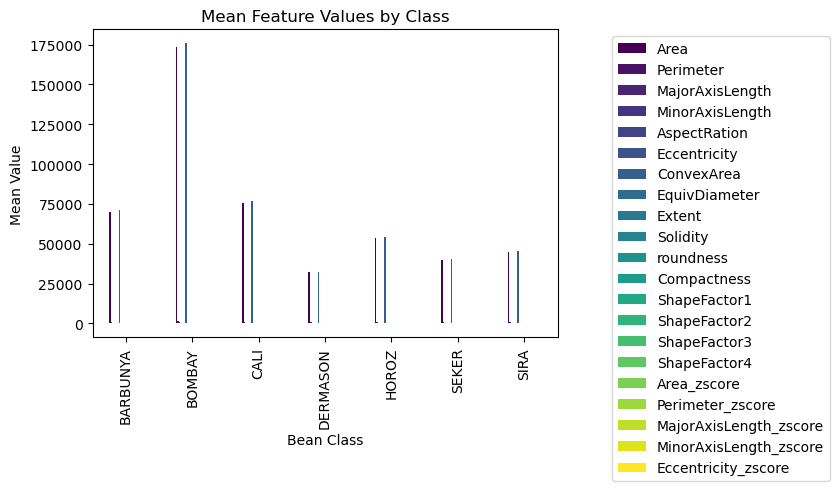

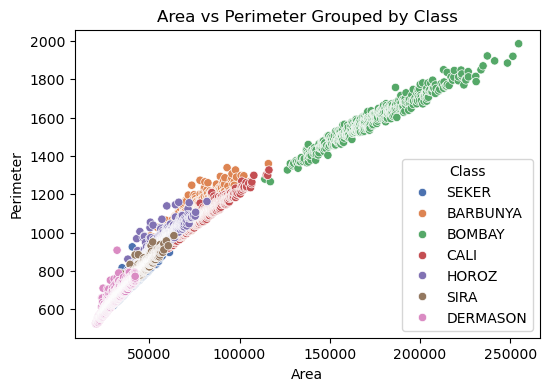

In [59]:

plt.figure(figsize=(6, 4))
grouped_data.plot(kind='bar', figsize=(6, 4), colormap='viridis')
plt.title('Mean Feature Values by Class')
plt.ylabel('Mean Value')
plt.xlabel('Bean Class')
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1.0))
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(data=bean, x='Area', y='Perimeter', hue='Class', palette='deep')
plt.title('Area vs Perimeter Grouped by Class')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.show()

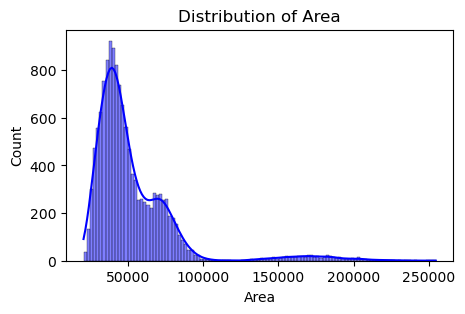

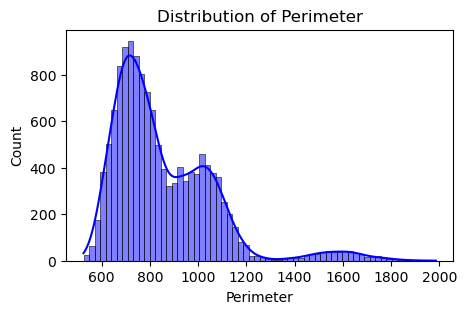

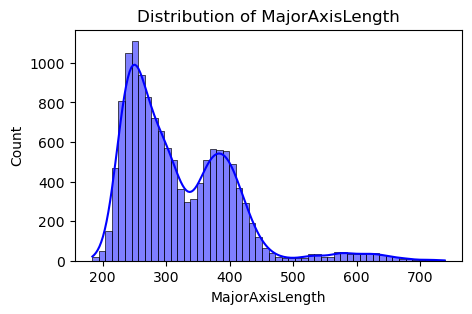

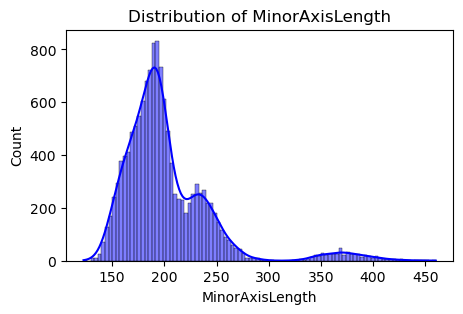

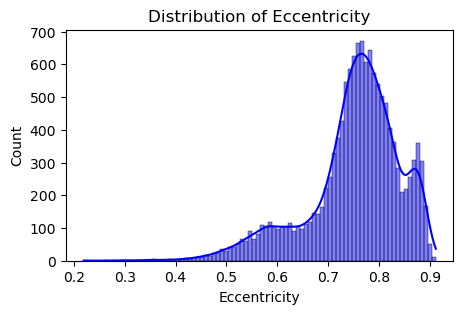

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity']
for feature in features:
    plt.figure(figsize=(5,3))
    sns.histplot(bean[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.show()

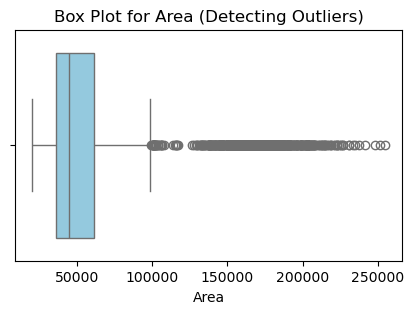

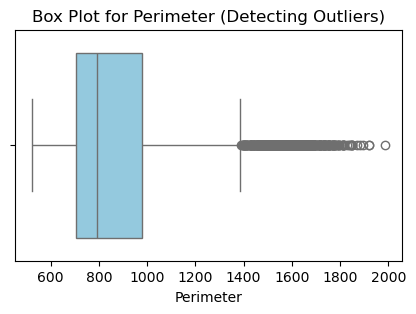

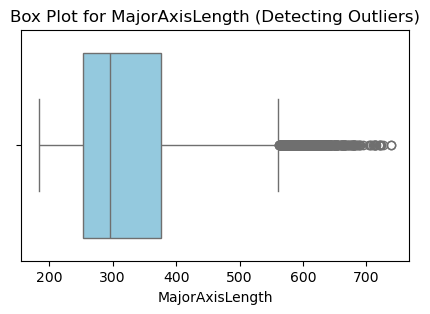

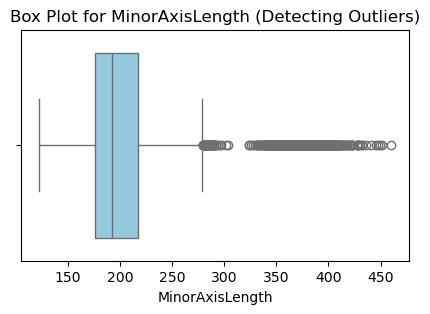

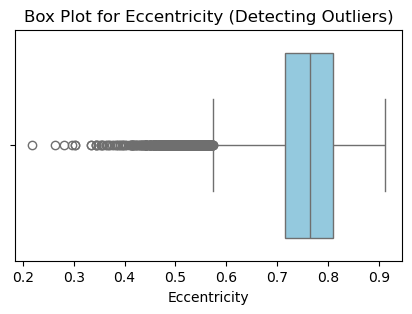

In [27]:
features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity']
for feature in features:
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=bean, x=feature, color='skyblue')
    plt.title(f'Box Plot for {feature} (Detecting Outliers)')
    plt.show()


In [35]:
from scipy.stats import zscore

threshold = 3  
outliers = pd.DataFrame()
for feature in features:
    bean[f'{feature}_zscore'] = zscore(bean[feature])  
    outliers[feature] = bean[bean[f'{feature}_zscore'].abs() > threshold][feature]

    # Display outliers if any
    if not outliers[feature].empty:
        print(f"\nOutliers in {feature}:")
        print(outliers[feature])
    else:
        print(f"No significant outliers found in {feature}.")



Outliers in Area:
3388    141385
3389    141519
3390    141850
3391    141953
3392    142154
         ...  
3866    237270
3867    241322
3868    248424
3869    251432
3870    254616
Name: Area, Length: 483, dtype: int64

Outliers in Perimeter:
3388         NaN
3389         NaN
3390         NaN
3391         NaN
3392         NaN
          ...   
3866    1921.685
3867    1895.940
3868    1884.557
3869    1919.868
3870    1985.370
Name: Perimeter, Length: 483, dtype: float64

Outliers in MajorAxisLength:
3388           NaN
3389           NaN
3390           NaN
3391           NaN
3392           NaN
           ...    
3866    738.144502
3867    726.373493
3868    715.053040
3869    719.125690
3870    738.860153
Name: MajorAxisLength, Length: 483, dtype: float64

Outliers in MinorAxisLength:
3388    344.355118
3389    347.095793
3390    346.910920
3391    346.397500
3392    361.669753
           ...    
3866    412.921647
3867    427.370120
3868    446.043618
3869    450.926187
3870    447.

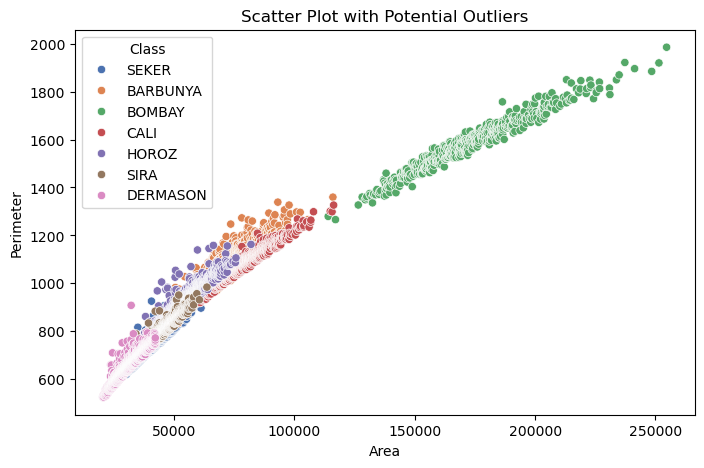

In [61]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=bean, x='Area', y='Perimeter', hue='Class', palette='deep')
plt.title('Scatter Plot with Potential Outliers')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.show()
